# Trabalho 1 - Inventário de emissões com Python
Desenvolvedores: José Henrique Hess e Kezia Bernarda de Oliveira

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import os

## Ler planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento.
Foi utilizado o capítulo 12.13 da AP42, pois a fundição de aço é a mais representativa da empresa WEG.
Link: https://www.epa.gov/sites/default/files/2020-11/documents/c12s13.pdf

In [39]:
# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = os.path.join(cwd, 'tabelas', 'FE')

# Indicando nome do arquivo
chapterNumer = 12
subChapter = 13
file = f'chp_{chapterNumer}_{subChapter}.csv'
print(file)

# Diretório do arquivo completo
full_path = os.path.join(path, file)
print(full_path)

# Abrindo o arquivo utilizando o pandas
fe = pd.read_csv(full_path, encoding='utf-8')
print(fe)

chp_12_13.csv
C:\Users\joseh\Documents\GitHub\ENS5173_202401\tabelas\FE\chp_12_13.csv
       Processo  Particula Filtravel  NOx  PM10
0         Fusão                  6.5  0.1   NaN
1        Moagem                  NaN  NaN  3.00
2        Fornos                  NaN  NaN  0.45
3  Derramamento                  NaN  NaN  1.40
4       Limpeza                  NaN  NaN  0.85
5    Tratamento                  NaN  NaN  0.18
6  Resfriamento                  NaN  NaN  0.70


8000000


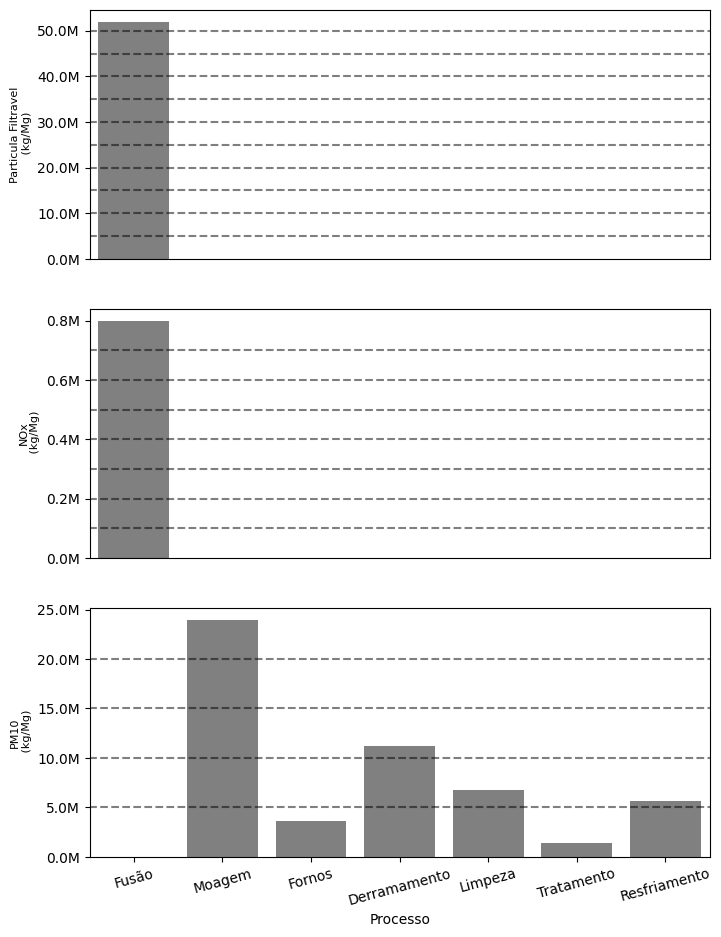

In [80]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Função para formatar os rótulos em milhões
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

atv = 8000000 # Considerando uma taxa de atividade
print(atv)

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# Sharex significa compartilhar eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex=True,figsize=(8,11))

#Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    ax[ii-1].bar(fe['Processo'], atv*fe.iloc[:,ii], color = 'gray')
    if ax[2] == ax[ii-1]:
        ax[ii-1].set_xlabel('Processo')
        ax[ii-1].set_xticks(range(len(fe['Processo'])))
        ax[ii-1].set_xticklabels(fe['Processo'], rotation=15)
    else: 
        ax[ii-1].xaxis.set_visible(False)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)',fontsize=8)

    # Configura o formatter para milhões
    formatter = FuncFormatter(millions)
    ax[ii-1].yaxis.set_major_formatter(formatter)

    ax[ii-1].set_xlim(-0.5,6.5)
    
    for i in range(1,int(atv*fe.iloc[:,ii].max())):
        if i%100000 == 0:
            if int(atv*fe.iloc[:,ii].max()) < 1000000:
                ax[ii-1].hlines(y=i,xmin=-1,xmax=7, alpha=0.5,linestyle='dashed', colors = 'black')
            else: 
                if i%5000000 == 0:
                    ax[ii-1].hlines(y=i,xmin=-1,xmax=7, alpha=0.5,linestyle='dashed', colors = 'black')



# Salva a figura na pasta figures - criar a pasta antes
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')